# ლექცია 9. 
### მონაცემების ფორმის ცვლილება (Reshaping). მონაცემების გახლეჩვა, დამუშავება და გაერთიანება. ჯვარედინა ტაბულაციის ცხრილები. მონაცემების ტრანსფორმაცია გრძელიდან განიერ და განიერიდან გრძელ ფორმატში.
 

1. stack(), unstack()
2. melt()
3. pivot()
4. explode()
5. pivot_table()
6. Crosstab()



files: stocks.xlsx


 
 

# 1. Reshape dataframe using stack/unstack


In [1]:
import pandas as pd


In [11]:
df = pd.read_excel('stocks.xlsx', header=[0,1], index_col=0)

In [12]:
df

Price                  Price to earnings ratio (P/E)         \
Company    Facebook Google Microsoft                      Facebook Google   
2017-06-05      155    955        66                         37.10   32.0   
2017-06-06      150    987        69                         36.98   31.3   
2017-06-07      153    963        62                         36.78   31.7   
2017-06-08      155   1000        61                         36.11   31.2   
2017-06-09      156   1012        66                         37.07   30.0   

                      
Company    Microsoft  
2017-06-05     30.31  
2017-06-06     30.56  
2017-06-07     30.46  
2017-06-08     30.11  
2017-06-09     31.00

In [13]:
df.stack()

Price  Price to earnings ratio (P/E)
           Company                                        
2017-06-05 Facebook     155                          37.10
           Google       955                          32.00
           Microsoft     66                          30.31
2017-06-06 Facebook     150                          36.98
           Google       987                          31.30
           Microsoft     69                          30.56
2017-06-07 Facebook     153                          36.78
           Google       963                          31.70
           Microsoft     62                          30.46
2017-06-08 Facebook     155                          36.11
           Google      1000                          31.20
           Microsoft     61                          30.11
2017-06-09 Facebook     156                          37.07
           Google      1012                          30.00
           Microsoft     66                          31.00

In [19]:
df_stacked = df.stack(level=1)
df_stacked

Price  Price to earnings ratio (P/E)
           Company                                        
2017-06-05 Facebook     155                          37.10
           Google       955                          32.00
           Microsoft     66                          30.31
2017-06-06 Facebook     150                          36.98
           Google       987                          31.30
           Microsoft     69                          30.56
2017-06-07 Facebook     153                          36.78
           Google       963                          31.70
           Microsoft     62                          30.46
2017-06-08 Facebook     155                          36.11
           Google      1000                          31.20
           Microsoft     61                          30.11
2017-06-09 Facebook     156                          37.07
           Google      1012                          30.00
           Microsoft     66                          31.00

In [22]:
df_stacked.unstack(level=1)

Price                  Price to earnings ratio (P/E)         \
Company    Facebook Google Microsoft                      Facebook Google   
2017-06-05      155    955        66                         37.10   32.0   
2017-06-06      150    987        69                         36.98   31.3   
2017-06-07      153    963        62                         36.78   31.7   
2017-06-08      155   1000        61                         36.11   31.2   
2017-06-09      156   1012        66                         37.07   30.0   

                      
Company    Microsoft  
2017-06-05     30.31  
2017-06-06     30.56  
2017-06-07     30.46  
2017-06-08     30.11  
2017-06-09     31.00

### Three levels of column headers

In [25]:
df = pd.read_excel('stocks.xlsx', header=[0,1,2], index_col=0, sheet_name=1)

In [26]:
df

Price Ratios                                                        \
               Price                  Price to earnings ratio (P/E)          
Company     Facebook Google Microsoft                      Facebook Google   
Q1 2016          155    955        66                         37.10   32.0   
Q2 2016          150    987        69                         36.98   31.3   
Q3 2016          153    963        62                         36.78   31.7   
Q4 2016          155   1000        61                         36.11   31.2   
Q1 2017          156   1012        66                         37.07   30.0   

                  Income Statement                                     \
                         Net Sales                  Net Profit          
Company Microsoft         Facebook Google Microsoft   Facebook Google   
Q1 2016     30.31              2.6     20     18.70       0.80   5.43   
Q2 2016     30.56              3.1     22     21.30       0.97   5.89   
Q3 2016     30.46              4.3     24     21.45       1.20   6.10   
Q4 2016     30.11              6.7     26     21.88       1.67   6.50   
Q1 2017     31.00              8.1     31     22.34       2.03   6.40   

                   
                   
Company Microsoft  
Q1 2016      4.56  
Q2 2016      5.10  
Q3 2016      5.43  
Q4 2016      5.89  
Q1 2017      6.09

In [28]:
df.stack(level=1)

Income Statement                   \
Company                                       Facebook Google Microsoft   
Q1 2016 Net Profit                                0.80   5.43      4.56   
        Net Sales                                 2.60  20.00     18.70   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   
Q2 2016 Net Profit                                0.97   5.89      5.10   
        Net Sales                                 3.10  22.00     21.30   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   
Q3 2016 Net Profit                                1.20   6.10      5.43   
        Net Sales                                 4.30  24.00     21.45   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   
Q4 2016 Net Profit                                1.67   6.50      5.89   
        Net Sales                                 6.70  26.00     21.88   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   
Q1 2017 Net Profit                                2.03   6.40      6.09   
        Net Sales                                 8.10  31.00     22.34   
        Price                                      NaN    NaN       NaN   
        Price to earnings ratio (P/E)              NaN    NaN       NaN   

                                      Price Ratios                    
Company                                   Facebook  Google Microsoft  
Q1 2016 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               155.00   955.0     66.00  
        Price to earnings ratio (P/E)        37.10    32.0     30.31  
Q2 2016 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               150.00   987.0     69.00  
        Price to earnings ratio (P/E)        36.98    31.3     30.56  
Q3 2016 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               153.00   963.0     62.00  
        Price to earnings ratio (P/E)        36.78    31.7     30.46  
Q4 2016 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               155.00  1000.0     61.00  
        Price to earnings ratio (P/E)        36.11    31.2     30.11  
Q1 2017 Net Profit                             NaN     NaN       NaN  
        Net Sales                              NaN     NaN       NaN  
        Price                               156.00  1012.0     66.00  
        Price to earnings ratio (P/E)        37.07    30.0     31.00

## 2. Reshaping a DataFrame using Pandas melt()

This is a notebook for the medium article https://github.com/BindiChen/machine-learning/blob/main/data-analysis/048-pandas-melt/pandas-melt.ipynb

In [29]:
import pandas as pd

In [31]:
df_wide = pd.DataFrame({
   "Country": ["France", "US", "UK"],
   "22/01/2020": [1,2,3],
   "23/01/2020": [4,5,6],
   "24/01/2020": [7,8,9],
   "25/01/2020": [10,11,12],
   "26/01/2020": [13,14,15],
  }
)
df_wide

,Country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,1,4,7,10,13
1,US,2,5,8,11,14
2,UK,3,6,9,12,15


In [49]:
df2 = df_wide.melt(id_vars='Country')

df2 = df2.reset_index()
df2 = df2.set_index(['index','Country'])
df2

,,variable,value
index,Country,,
0,France,22/01/2020,1
1,US,22/01/2020,2
2,UK,22/01/2020,3
3,France,23/01/2020,4
4,US,23/01/2020,5
5,UK,23/01/2020,6
6,France,24/01/2020,7
7,US,24/01/2020,8
8,UK,24/01/2020,9


In [48]:
df2.unstack()

variable                          value            
Country      France          UK          US France    UK    US
index                                                         
0        22/01/2020         NaN         NaN    1.0   NaN   NaN
1               NaN         NaN  22/01/2020    NaN   NaN   2.0
2               NaN  22/01/2020         NaN    NaN   3.0   NaN
3        23/01/2020         NaN         NaN    4.0   NaN   NaN
4               NaN         NaN  23/01/2020    NaN   NaN   5.0
5               NaN  23/01/2020         NaN    NaN   6.0   NaN
6        24/01/2020         NaN         NaN    7.0   NaN   NaN
7               NaN         NaN  24/01/2020    NaN   NaN   8.0
8               NaN  24/01/2020         NaN    NaN   9.0   NaN
9        25/01/2020         NaN         NaN   10.0   NaN   NaN
10              NaN         NaN  25/01/2020    NaN   NaN  11.0
11              NaN  25/01/2020         NaN    NaN  12.0   NaN
12       26/01/2020         NaN         NaN   13.0   NaN   NaN
13              NaN         NaN  26/01/2020    NaN   NaN  14.0
14              NaN  26/01/2020         NaN    NaN  15.0   NaN

In [52]:
df2 = df_wide.melt(id_vars='Country', var_name='Date', value_name='Cases' )
df2

,Country,Date,Cases
0,France,22/01/2020,1
1,US,22/01/2020,2
2,UK,22/01/2020,3
3,France,23/01/2020,4
4,US,23/01/2020,5
5,UK,23/01/2020,6
6,France,24/01/2020,7
7,US,24/01/2020,8
8,UK,24/01/2020,9
9,France,25/01/2020,10


In [53]:
# Multiple ids - რამდენიმე სვეტი როცა გვინდა რომ დავაფიქსიროთ
df_wide = pd.DataFrame({
   "Country": ["France", "US", "UK"],
   "Lat": [31.8257, 40.0, 55.3781],
   "Long": [117.2264, -100.0, -3.436],
   "22/01/2020": [1,2,3],
   "23/01/2020": [4,5,6],
   "24/01/2020": [7,8,9],
   "25/01/2020": [10,11,12],
   "26/01/2020": [13,14,15],
  }
)
df_wide

,Country,Lat,Long,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,31.8257,117.2264,1,4,7,10,13
1,US,40.0000,-100.0000,2,5,8,11,14
2,UK,55.3781,-3.4360,3,6,9,12,15


In [54]:
# Specify the columns to melt
df_wide.melt(id_vars=['Country', 'Lat','Long'],var_name='Date', value_name='Cases')

,Country,Lat,Long,Date,Cases
0,France,31.8257,117.2264,22/01/2020,1
1,US,40.0000,-100.0000,22/01/2020,2
2,UK,55.3781,-3.4360,22/01/2020,3
3,France,31.8257,117.2264,23/01/2020,4
4,US,40.0000,-100.0000,23/01/2020,5
5,UK,55.3781,-3.4360,23/01/2020,6
6,France,31.8257,117.2264,24/01/2020,7
7,US,40.0000,-100.0000,24/01/2020,8
8,UK,55.3781,-3.4360,24/01/2020,9
9,France,31.8257,117.2264,25/01/2020,10


In [55]:
# Specify and filter the date values to melt
df_wide.melt(id_vars=['Country', 'Lat','Long'], 
             value_vars=['22/01/2020', '23/01/2020'],
             var_name='Date', 
             value_name='Cases')

,Country,Lat,Long,Date,Cases
0,France,31.8257,117.2264,22/01/2020,1
1,US,40.0000,-100.0000,22/01/2020,2
2,UK,55.3781,-3.4360,22/01/2020,3
3,France,31.8257,117.2264,23/01/2020,4
4,US,40.0000,-100.0000,23/01/2020,5
5,UK,55.3781,-3.4360,23/01/2020,6


In [56]:
# You can also call melt directly from pandas instead of your DataFrame. However, these are identical
pd.melt(df_wide, id_vars=['Country', 'Lat','Long'], )

,Country,Lat,Long,variable,value
0,France,31.8257,117.2264,22/01/2020,1
1,US,40.0000,-100.0000,22/01/2020,2
2,UK,55.3781,-3.4360,22/01/2020,3
3,France,31.8257,117.2264,23/01/2020,4
4,US,40.0000,-100.0000,23/01/2020,5
5,UK,55.3781,-3.4360,23/01/2020,6
6,France,31.8257,117.2264,24/01/2020,7
7,US,40.0000,-100.0000,24/01/2020,8
8,UK,55.3781,-3.4360,24/01/2020,9
9,France,31.8257,117.2264,25/01/2020,10


### Exercise: Covid-19 time series data preprocessing

In [57]:
# Loading confirmed, death, and recovered dataset
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [59]:
confirmed_df.shape, deaths_df.shape, recovered_df.shape

((264, 93), (264, 93), (250, 93))

In [61]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [64]:
# Reshaping them from wide to long format with the same date values
# Create a date list
new_col = confirmed_df.columns[:4]
dates = confirmed_df.columns[4:]

In [71]:
confirmed_df_long = confirmed_df.melt(id_vars=new_col, value_vars=dates, var_name='Date', value_name='Confirmed')
deaths_df_long = deaths_df.melt(id_vars=new_col, value_vars=dates, var_name='Date', value_name='Deaths')
recovered_df_long = recovered_df.melt(id_vars=new_col, value_vars=dates, var_name='Date', value_name='Recovered')


In [75]:
confirmed_df_long.columns[:5]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'], dtype='object')

In [77]:
full_table = confirmed_df_long.merge(deaths_df_long, how='left', on= ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'] )

In [79]:
full_table = full_table.merge(recovered_df_long, how='left', on= ['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'] )

In [80]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
23491,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/19/20,1,0,0.0
23492,NaN,South Sudan,6.877000,31.307000,4/19/20,4,0,0.0
23493,NaN,Western Sahara,24.215500,-12.885800,4/19/20,6,0,0.0
23494,NaN,Sao Tome and Principe,0.186360,6.613081,4/19/20,4,0,0.0


## 3. Pivot
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns. See the User Guide for more on reshaping.

In [81]:
df_wide = pd.DataFrame({
   "Country": ["France", "US", "UK"],
   "22/01/2020": [1,2,3],
   "23/01/2020": [4,5,6],
   "24/01/2020": [7,8,9],
   "25/01/2020": [10,11,12],
   "26/01/2020": [13,14,15],
  }
)
df_wide

,Country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,1,4,7,10,13
1,US,2,5,8,11,14
2,UK,3,6,9,12,15


In [82]:
df_long = df_wide.melt(
    id_vars='Country',
    var_name='Date',
    value_name='Cases'
)
df_long

,Country,Date,Cases
0,France,22/01/2020,1
1,US,22/01/2020,2
2,UK,22/01/2020,3
3,France,23/01/2020,4
4,US,23/01/2020,5
5,UK,23/01/2020,6
6,France,24/01/2020,7
7,US,24/01/2020,8
8,UK,24/01/2020,9
9,France,25/01/2020,10


In [88]:
df_long.pivot(columns='Date', index='Country', values='Cases')

Date,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
Country,,,,,
France,1,4,7,10,13
UK,3,6,9,12,15
US,2,5,8,11,14


In [ ]:
# Spcify the values='Cases' to remove the hierarchically indexed 'Date'

#  4. explode() - Unnest/flatten/explode list-like columns with Pandas



In [89]:
import numpy as np
import pandas as pd

In [90]:
df = pd.DataFrame({
    'class': ['Year 1', 'Year 2'],
    'students': [['Tom', 'Jane'], ['Liz', 'James']]
})

df

,class,students
0,Year 1,"[Tom, Jane]"
1,Year 2,"[Liz, James]"


In [91]:
# Availble in Series (for specific column), notice that rows now have the same index value
df['students'].explode()

0      Tom
0     Jane
1      Liz
1    James
Name: students, dtype: object

In [96]:
# Pandas/df method, notice that rows now have the same index value
df.explode(column='students')

,class,students
0,Year 1,Tom
0,Year 1,Jane
1,Year 2,Liz
1,Year 2,James


In [97]:
df.explode(column='students', ignore_index=True)

,class,students
0,Year 1,Tom
1,Year 1,Jane
2,Year 2,Liz
3,Year 2,James


In [100]:
# Reset index with ignore_index=True or reset_index()/reset_index(drop=True)
df.explode(column='students').reset_index(drop=True)

,class,students
0,Year 1,Tom
1,Year 1,Jane
2,Year 2,Liz
3,Year 2,James


In [101]:
# String with delimiter
s = pd.Series([
    'Tom, Jane', 
    'Liz, James', 
    'Katie, Sean'
])

s

0      Tom, Jane
1     Liz, James
2    Katie, Sean
dtype: object

In [104]:
s.str.split(',').explode()

0       Tom
0      Jane
1       Liz
1     James
2     Katie
2      Sean
dtype: object

In [107]:
# Dataframe use cases - Other value
df = pd.DataFrame({
    'class': ['Year 1', 'Year 2', 'Year 3', 'Year 4'],
    'students': [
        ['Tom', 'Jane'], 
        'I am a string', 
        101, 
        ['Katie', 'Sean']
    ]
})

df

,class,students
0,Year 1,"[Tom, Jane]"
1,Year 2,I am a string
2,Year 3,101
3,Year 4,"[Katie, Sean]"


In [109]:
df.explode('students')

,class,students
0,Year 1,Tom
0,Year 1,Jane
1,Year 2,I am a string
2,Year 3,101
3,Year 4,Katie
3,Year 4,Sean


## 5. pivot table
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.
More info about database: https://www.kaggle.com/datasets/uciml/adult-census-income


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
column_names = ['age', 'workclass','fnlwgt', 'education', 'education_num','marital_status', 
                         'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss',
                         'hours_per_week', 'native_country','label']
adult  = pd.read_csv("adult_data.csv", names = column_names)

print(adult.shape)
adult.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


As seen above, Some of the features are age, workclass, education, marital_status, race, sex, native_country, hours_per_week and response feature label. Also will replace label values <=50K, >50K by 0 and 1 respectively.

Usually earnings are frequently associated with occupation. So, let's pivot the occupation and see which occupations have high earning people.

In [114]:
# unique() function & value_counts()
adult['label'].value_counts()
adult['label'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [116]:
#replacement of label values 
# np.where()
adult['label_num'] = np.where(adult['label']==' <=50K', 0, 1)

In [117]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label,label_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [127]:
pt = adult.pivot_table(index='education', columns='sex', aggfunc='sum', values='label_num')

In [128]:
pt

sex,Female,Male
education,,
10th,3,59
11th,8,52
12th,4,29
1st-4th,0,6
5th-6th,2,14
7th-8th,1,39
9th,5,22
Assoc-acdm,56,209
Assoc-voc,67,294


<Axes: xlabel='education'>

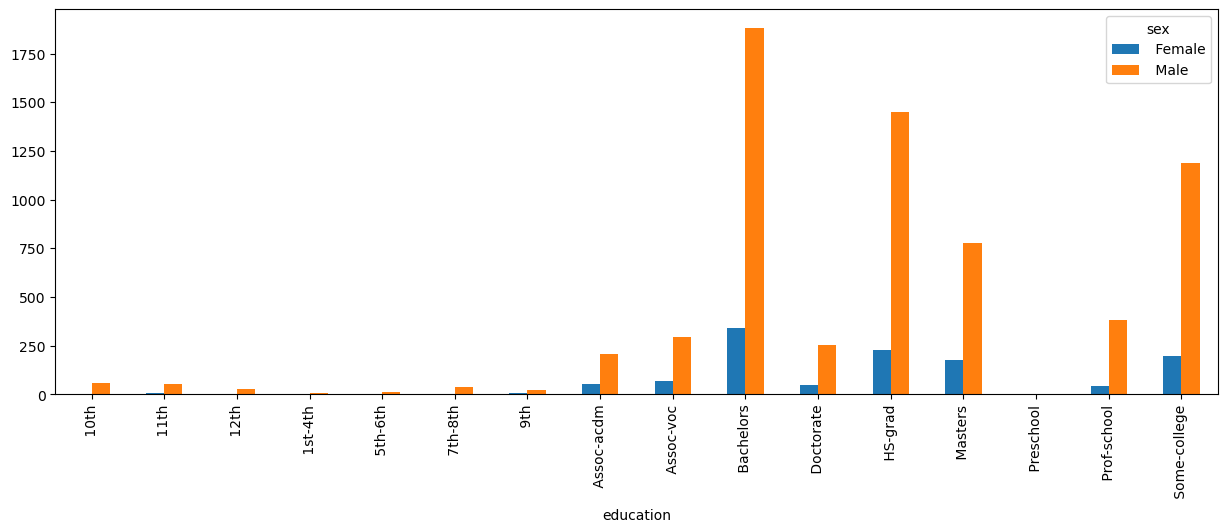

In [129]:
pt.plot(kind='bar', figsize=(15,5))

In [130]:
pt = adult.pivot_table(index='education', columns=['sex', 'race'], aggfunc='sum', values='label_num')

In [131]:
pt

sex                        Female                                           \
race           Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White   
education                                                                    
 10th                         0.0                 1.0    0.0    0.0    2.0   
 11th                         0.0                 0.0    3.0    0.0    5.0   
 12th                         NaN                 0.0    2.0    0.0    2.0   
 1st-4th                      0.0                 0.0    0.0    0.0    0.0   
 5th-6th                      NaN                 2.0    0.0    0.0    0.0   
 7th-8th                      0.0                 0.0    0.0    0.0    1.0   
 9th                          0.0                 1.0    0.0    0.0    4.0   
 Assoc-acdm                   1.0                 3.0    5.0    1.0   46.0   
 Assoc-voc                    1.0                 1.0    6.0    0.0   59.0   
 Bachelors                    3.0                18.0   27.0    3.0  288.0   
 Doctorate                    1.0                 NaN    3.0    NaN   46.0   
 HS-grad                      2.0                 5.0   12.0    0.0  207.0   
 Masters                      2.0                 5.0   15.0    1.0  156.0   
 Preschool                    NaN                 0.0    0.0    NaN    0.0   
 Prof-school                  1.0                 2.0    1.0    NaN   38.0   
 Some-college                 1.0                 5.0   16.0    1.0  174.0   

sex                          Male                                            
race           Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other   White  
education                                                                    
 10th                         0.0                 0.0    6.0    1.0    52.0  
 11th                         2.0                 1.0    4.0    0.0    45.0  
 12th                         0.0                 1.0    3.0    0.0    25.0  
 1st-4th                      0.0                 0.0    1.0    0.0     5.0  
 5th-6th                      0.0                 1.0    0.0    1.0    12.0  
 7th-8th                      0.0                 0.0    2.0    0.0    37.0  
 9th                          0.0                 0.0    4.0    0.0    18.0  
 Assoc-acdm                   0.0                 5.0   14.0    1.0   189.0  
 Assoc-voc                    0.0                 8.0   12.0    0.0   274.0  
 Bachelors                    5.0                79.0   69.0    2.0  1727.0  
 Doctorate                    1.0                18.0    6.0    1.0   230.0  
 HS-grad                      9.0                29.0   74.0    2.0  1335.0  
 Masters                      1.0                38.0   25.0    1.0   715.0  
 Preschool                    NaN                 0.0    0.0    0.0     0.0  
 Prof-school                  1.0                25.0    7.0    4.0   344.0  
 Some-college                 5.0                28.0   70.0    6.0  1081.0

<Axes: xlabel='education'>

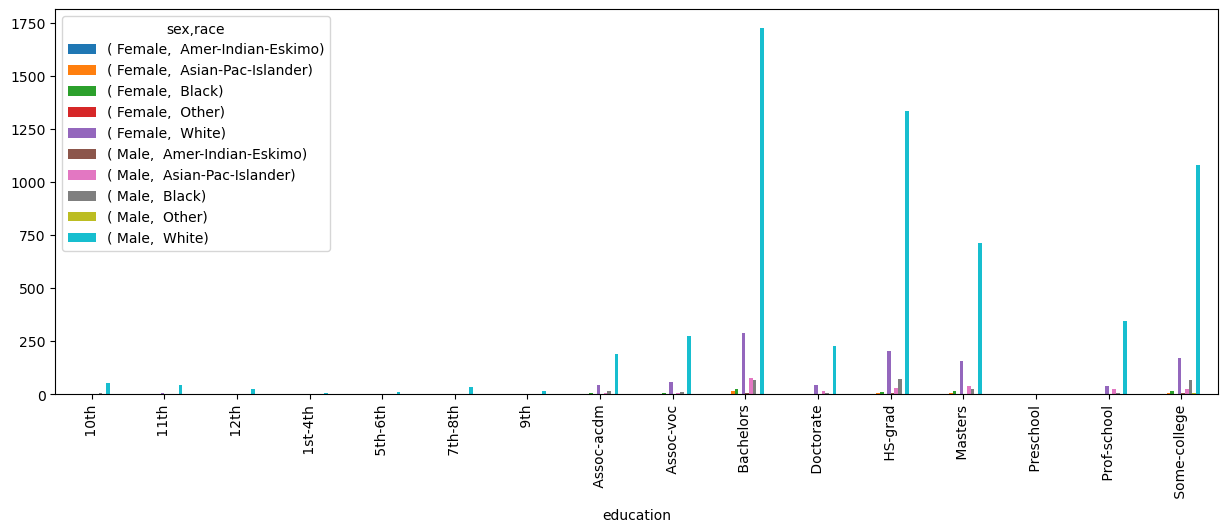

In [132]:
pt.plot(kind='bar', figsize=(15,5))

## 6. Crosstab
pd.crosstab can be used just like  pivot_table, but it computes a simple cross-tabulation of two (or more) categorical features. 
By default it computes a frequency table of the categorical features, since values are not mandatory for crosstab, but values and aggregation function can be passed, if required.<br>
Let's look at a simple example of crosstab and plot it. Education is also one important factor in earning.

In [134]:
pd.crosstab(index=adult['education'], columns=adult['race'] )

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
education,,,,,
10th,16,13,133,9,762
11th,14,21,153,10,977
12th,5,9,70,14,335
1st-4th,4,5,16,9,134
5th-6th,2,18,21,13,279
7th-8th,9,11,56,17,553
9th,5,9,89,8,403
Assoc-acdm,8,29,107,8,915
Assoc-voc,19,38,112,6,1207


In [137]:
pd.crosstab(index=adult['education'], columns=adult['race'], aggfunc='sum', values=adult['label_num'])

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
education,,,,,
10th,0.0,1.0,6.0,1.0,54.0
11th,2.0,1.0,7.0,0.0,50.0
12th,0.0,1.0,5.0,0.0,27.0
1st-4th,0.0,0.0,1.0,0.0,5.0
5th-6th,0.0,3.0,0.0,1.0,12.0
7th-8th,0.0,0.0,2.0,0.0,38.0
9th,0.0,1.0,4.0,0.0,22.0
Assoc-acdm,1.0,8.0,19.0,2.0,235.0
Assoc-voc,1.0,9.0,18.0,0.0,333.0


In [ ]:
# crosstab viwth values and aggfunc